In [1]:
import numpy as np
import sys
sys.path.append('../packages/dpcluster-0.104')
from dpcluster import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors.kde import KernelDensity
%matplotlib inline

## Playing with Data

In [41]:
full_final_DF = pd.read_json('JSONs/full_final.json')

In [43]:
full_final_DF

0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
100      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1000     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10000    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10001    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10002    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10003    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10004    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10005    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10006    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10007    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10008    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10009    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1001     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10010    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, .

In [ ]:
final_blocks = pd.read_json('JSONs/final_blocks.json')

In [2]:
final_blocks = pd.read_json('JSONs/final_blocks.json')

In [7]:
final = final_blocks

In [43]:
hists = []
pdfs = []
hists_q3 = []
pdfs_q3 = []
for i in range(len(final)):
    hist, bin_h = np.histogram(final['val'].iloc[i], bins = 300, range = (0, 300), density = False)
    pdf, bin_p = np.histogram(final['val'].iloc[i], bins = 300, range = (0, 300), density = True)
    hist_q3, bin_h3 = np.histogram(final['val'].iloc[i], bins = 100, range = (0, 300), density = False)
    pdf_q3, bin_p3 = np.histogram(final['val'].iloc[i], bins = 100, range = (0, 300), density = True)
    
    pdfs.append(pdf)
    hists.append(hist) 
    pdfs_q3.append(pdf_q3)
    hists_q3.append(hist_q3)
final['pdf'] = pd.Series(pdfs)
final['hist'] = pd.Series(hists)
final['pdf_q3'] = pd.Series(pdfs_q3)
final['hist_q3'] = pd.Series(hists_q3)

<Container object of 100 artists>

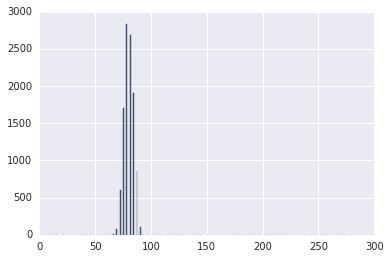

In [46]:
plt.bar(range(0,300, 3), final['hist_q3'].iloc[1])

In [48]:
plt.figure(figsize=(10,10))
for j in range(5):
    sns.distplot(final['val'].iloc[j], hist = True, kde_kws={},
                     hist_kws={bins:100, range:(0, 300)})

NameError: name 'bins' is not defined

In [39]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(final['val'])

ValueError: setting an array element with a sequence.

#### Creating final df

In [2]:
final_NO_SERIES = pd.read_json('JSONs/final_NO_SERIES.json')

In [3]:
final_with_meds = pd.read_json('JSONs/final_with_meds_FINAL.json')

In [4]:
final_NO_SERIES = final_NO_SERIES.drop(['DOB', 'DeathDate', 'PAT_ID','index','date','end_time','start_time', 'length_of_block', 'index'], axis =1)

In [5]:
final_NO_SERIES.columns

Index([u'Age', u'EthnicGroup', u'Gender', u'ICU_unit', u'Race', u'SA_ID',
       u'hist', u'pdf'],
      dtype='object')

In [6]:
final_with_meds = final_with_meds.drop([u'Age', u'EthnicGroup', u'Gender', u'ICU_unit', u'Race',
       u'hist', 'DOB', 'DeathDate', 'PAT_ID','index','date','end_time','start_time', 'pdf', 'length_of_block', 'index', 'date', 'end_time', 'index', 'length_of_block', 'pdf', 'hist', 'start_time'], axis = 1)

In [7]:
print final_NO_SERIES.shape
final_with_meds.shape

(11111, 8)


(11111, 85)

In [8]:
full_final = final_with_meds.join(final_NO_SERIES, how='inner', lsuffix = 'med')

In [9]:
full_final.shape

(11111, 93)

In [10]:
hist_avg = np.divide(map(sum, zip(*full_final['pdf'].values)), len(full_final))

In [11]:
full_final.to_json('JSONs/full_final.json')

In [ ]:
full_final['Gender'] = full_final['Gender'].replace(['Male', 'Female'], [0, 1])
full_final.drop(['SA_ID', 'hist'], axis = 1, inplace = True)
full_final.drop(['SA_IDmed'], axis = 1, inplace = True)

In [30]:
full_final_subset = full_final[['Age', 'EthnicGroup', 'Gender', 'ICU_unit', 'Race', 'pdf']]

In [38]:
full_final_subset.columns

Index([u'Age', u'EthnicGroup', u'Gender', u'ICU_unit', u'Race', u'pdf'], dtype='object')

In [ ]:
full_final_subset[full_final_subset.Age > 80].Age

In [40]:
given_meds

NameError: name 'given_meds' is not defined

# Decision Tree

### Data

In [13]:
my_data=[['slashdot','USA','yes',18,'None'],
        ['google','France','yes',23,'Premium'],
        ['reddit','USA','yes',24,'Basic'],
        ['kiwitobes','France','yes',23,'Basic'],
        ['google','UK','no',21,'Premium'],
        ['(direct)','New Zealand','no',12,'None'],
        ['(direct)','UK','no',21,'Basic'],
        ['google','USA','no',24,'Premium'],
        ['slashdot','France','yes',19,'None'],
        ['reddit','USA','no',18,'None'],
        ['google','UK','no',18,'None'],
        ['kiwitobes','UK','no',19,'None'],
        ['reddit','New Zealand','yes',12,'Basic'],
        ['slashdot','UK','no',21,'None'],
        ['google','UK','yes',18,'Basic'],
        ['kiwitobes','France','yes',19,'Basic']]

### Decision Node Class

In [14]:
class decisionnode:
    def __init__(self,col=-1,value=None,results=None,tb=None,fb=None):
        self.col=col # column index of criteria being tested
        self.value=value # vlaue necessary to get a true result
        self.results=results # dict of results for a branch, None for everything except endpoints
        self.tb=tb # true decision nodes 
        self.fb=fb # false decision nodes
    def __str__(self):
        return "COL: %s | VALUE: %s | RESULTS: %s | TB: %s | FB: %s \n\n" %(str(self.col), 
                                                                       str(self.value),
                                                                       str(self.results),
                                                                       str(self.tb),
                                                                       str(self.fb))

In [15]:
# Create counts of possible results (last column of each row is the result)
def uniquecounts(rows):
    results={}
    for row in rows:
        # The result is the last column
        r=row[len(row)-1]
        if r not in results: results[r]=0
        results[r]+=1
    return results

In [16]:
from collections import defaultdict
def uniquecounts_dd(rows):
    results = defaultdict(lambda: 0)
    for row in rows:
        r = row[len(row)-1]
        results[r]+=1
    return dict(results) 

### Divides a set on a specific column. 
    Can handle numeric or nominal values

In [17]:
def divideset(rows,column,value):
    # Make a function that tells us if a row is in the first group 
    # (true) or the second group (false)
    split_function=None
    # for numerical values
    if isinstance(value,int) or isinstance(value,float):
        split_function=lambda row:row[column]>=value
    # for nominal values
    else:
        split_function=lambda row:row[column]==value
   
   # Divide the rows into two lists and return them
    list1=[row for row in rows if split_function(row)] # if split_function(row) 
    list2=[row for row in rows if not split_function(row)]
    return (list1,list2)

In [18]:
divideset(my_data,1,'USA')

([['slashdot', 'USA', 'yes', 18, 'None'],
  ['reddit', 'USA', 'yes', 24, 'Basic'],
  ['google', 'USA', 'no', 24, 'Premium'],
  ['reddit', 'USA', 'no', 18, 'None']],
 [['google', 'France', 'yes', 23, 'Premium'],
  ['kiwitobes', 'France', 'yes', 23, 'Basic'],
  ['google', 'UK', 'no', 21, 'Premium'],
  ['(direct)', 'New Zealand', 'no', 12, 'None'],
  ['(direct)', 'UK', 'no', 21, 'Basic'],
  ['slashdot', 'France', 'yes', 19, 'None'],
  ['google', 'UK', 'no', 18, 'None'],
  ['kiwitobes', 'UK', 'no', 19, 'None'],
  ['reddit', 'New Zealand', 'yes', 12, 'Basic'],
  ['slashdot', 'UK', 'no', 21, 'None'],
  ['google', 'UK', 'yes', 18, 'Basic'],
  ['kiwitobes', 'France', 'yes', 19, 'Basic']])

### Entropy/KL divergence

In [19]:
from scipy import stats

# Entropy is the sum of p(x)log(p(x)) across all the different possible results
def entropy(rows):
    from math import log
    log2=lambda x:log(x)/log(2)  
    results=uniquecounts(rows)
    # Now calculate the entropy
    ent=0.0
    for r in results.keys():
        # current probability of class
        p=float(results[r])/len(rows) 
        ent=ent-p*log2(p)
    return ent

In [ ]:
# Entropy is the sum of p(x)log(p(x)) across all the different possible results
#targets should be array of arrays of pdfs
def KL_div(PDF_dists):
    #KL divergence between each distribution and avg
    divs = []
    #print "SUM 10 PDFS: ", map(sum, zip(*PDF_dists[0:10]))
    
    pdf_avg = np.divide(map(sum, zip(*PDF_dists)), len(PDF_dists))
    for pdf in PDF_dists:
        divs.append(scipy.stats.entropy(pdf, pdf_avg))

    KL_div = sum(divs)
    return KL_div

#     from math import log
#     log2=lambda x:log(x)/log(2)  
#     results=uniquecounts(rows)
#     # Now calculate the entropy
#     ent=0.0
#     for r in results.keys():
#         # current probability of class
#         p=float(results[r])/len(rows) 
#         ent=ent-p*log2(p)
#     return ent

In [37]:
len(full_final['ANALGESICS, NARCOTICS'].value_counts())

3130

### Build Trees

In [21]:
def buildKLtree(rows, scorefun=KL_div):
    
    if len(rows) == 0: 
        print "EMPTY."
        return decisionnode()
    
    best_gain = 0.0
    best_criteria = None
    best_lists = None

#     print "ROWS: "
#     print rows
    
    ####REMEMBER TO CHANGE DATA SO PDF IS LAST COLUMN
    # Assumes last item in each row is pdf dist
    pdf_dists = [item[-1] for item in rows]
#     print pdf_dists[0]
    current_score = scorefun(pdf_dists)
#     print "SCORE", current_score
#     print
    
    len_features = len(rows[0]) - 1 # to get number of features
    
    #all columns of features
    for col in range(0, len_features):
        
        # find different values in this column
        column_values = set([row[col] for row in rows])

        # for each possible value, try to divide on that value
        for value in column_values:
            list1, list2 = divideset(rows, col, value)

            # Information gain
#             p = float(len(list1)) / len(rows)
            pdfs_left = [item[-1] for item in list1]
            pdfs_right = [item[-1] for item in list2]
            gain = current_score - (scorefun(pdfs_left) + scorefun(pdfs_right))
            
        #IS THIS WHERE min leaf size?
            if gain > best_gain and len(list1) > 0 and len(list2) > 0:
                best_gain = gain
                best_criteria = (col, value)
                best_lists = (list2, list2)
    
    #print "BEST CRITERIA: "
    #print best_criteria
    if best_gain > 0:
        print "Split."
        trueBranch = buildtree(best_lists[0])
        falseBranch = buildtree(best_lists[1])
        return decisionnode(col=best_criteria[0], value=best_criteria[1],
                tb=trueBranch, fb=falseBranch)
    else:
        print "Leaf."
        return decisionnode(results=uniquecounts(rows))

In [22]:
def buildtree(rows, scorefun=entropy):
    if len(rows) == 0: 
        print "EMPTY."
        return decisionnode()
    
    current_score = scorefun(rows)

    best_gain = 0.0
    best_criteria = None
    best_sets = None

    column_count = len(rows[0]) - 1	# last column is result
    for col in range(0, column_count):
        # find different values in this column
        column_values = set([row[col] for row in rows])

        # for each possible value, try to divide on that value
        for value in column_values:
            set1, set2 = divideset(rows, col, value)

            # Information gain
            p = float(len(set1)) / len(rows)
            gain = current_score - p*scorefun(set1) - (1-p)*scorefun(set2)
            if gain > best_gain and len(set1) > 0 and len(set2) > 0:
                best_gain = gain
                best_criteria = (col, value)
                best_sets = (set1, set2)

    if best_gain > 0:
        print "Stopping?"
        trueBranch = buildtree(best_sets[0])
        falseBranch = buildtree(best_sets[1])
        print "TRUE: ", trueBranch
        print "FALSE: ", falseBranch
        return decisionnode(col=best_criteria[0], value=best_criteria[1],
                tb=trueBranch, fb=falseBranch)
    else:
        return decisionnode(results=uniquecounts(rows))

## Output Tree

In [23]:
def printtree(tree,indent=''):
    # Is this a leaf node?
    if tree.results!=None:
        print str(tree.results)
    else:
        # Print the criteria
        print 'Column ' + str(tree.col)+' : '+str(tree.value)+'? '

        # Print the branches
        print indent+'True->',
        printtree(tree.tb,indent+'  ')
        print indent+'False->',
        printtree(tree.fb,indent+'  ')

In [26]:
full_final.keys()#.columns

Index([u'ABSORBABLE SULFONAMIDE ANTIBACTERIAL AGENTS',
       u'ADRENERGIC AGENTS,CATECHOLAMINES', u'ADRENERGIC VASOPRESSOR AGENTS',
       u'ALPHA-2 RECEPTOR ANTAGONIST ANTIDEPRESSANTS',
       u'ALPHA-ADRENERGIC BLOCKING AGENTS',
       u'ALPHA/BETA-ADRENERGIC BLOCKING AGENTS', u'AMINOGLYCOSIDES',
       u'ANALGESIC/ANTIPYRETICS, SALICYLATES',
       u'ANALGESIC/ANTIPYRETICS,NON-SALICYLATE',
       u'ANALGESICS NARCOTIC, ANESTHETIC ADJUNCT AGENTS',
       u'ANALGESICS, NARCOTICS', u'ANDROGENIC AGENTS', u'ANTI-ANXIETY DRUGS',
       u'ANTI-PSYCHOTICS,PHENOTHIAZINES', u'ANTIARRHYTHMICS',
       u'ANTICHOLINERGICS,QUATERNARY AMMONIUM',
       u'ANTICOAGULANTS,COUMARIN TYPE',
       u'ANTIDIURETIC AND VASOPRESSOR HORMONES', u'ANTIFUNGAL AGENTS',
       u'ANTIFUNGAL ANTIBIOTICS', u'ANTIHISTAMINES - 1ST GENERATION',
       u'ANTIHISTAMINES - 2ND GENERATION',
       u'ANTIHYPERTENSIVES, ACE INHIBITORS',
       u'ANTIHYPERTENSIVES, ANGIOTENSIN RECEPTOR ANTAGONIST',
       u'ANTIHYPERTENSIVES

In [ ]:
FINAL_TREE = buildKLtree(full_final.values)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 376, in _fixed_getinnerframes
    lines = ulinecache.getlines(file)[start:end]
  File "/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/utils/ulinecache.py", line 37, in getlines
    return [l.decode(encoding, 'replace') for l in lines]
KeyboardInterrupt


IndexError: string index out of range

In [ ]:
np.histogram()

In [26]:
printtree(FINAL_TREE)

KeyboardInterrupt: 

In [202]:
printtree(buildtree(my_data))

Stopping?
Stopping?
Stopping?
TRUE:  COL: -1 | VALUE: None | RESULTS: {'Basic': 1} | TB: None | FB: None 


FALSE:  COL: -1 | VALUE: None | RESULTS: {'None': 1} | TB: None | FB: None 


TRUE:  COL: -1 | VALUE: None | RESULTS: {'Premium': 3} | TB: None | FB: None 


FALSE:  COL: 2 | VALUE: yes | RESULTS: None | TB: COL: -1 | VALUE: None | RESULTS: {'Basic': 1} | TB: None | FB: None 

 | FB: COL: -1 | VALUE: None | RESULTS: {'None': 1} | TB: None | FB: None 

 


Stopping?
Stopping?
Stopping?
TRUE:  COL: -1 | VALUE: None | RESULTS: {'Basic': 1} | TB: None | FB: None 


FALSE:  COL: -1 | VALUE: None | RESULTS: {'None': 3} | TB: None | FB: None 


TRUE:  COL: -1 | VALUE: None | RESULTS: {'Basic': 4} | TB: None | FB: None 


FALSE:  COL: 3 | VALUE: 21 | RESULTS: None | TB: COL: -1 | VALUE: None | RESULTS: {'Basic': 1} | TB: None | FB: None 

 | FB: COL: -1 | VALUE: None | RESULTS: {'None': 3} | TB: None | FB: None 

 


TRUE:  COL: -1 | VALUE: None | RESULTS: {'None': 3} | TB: None | FB: No

## MORE Playing with Data

### Histogram of all heart rate in ICU

<Container object of 300 artists>

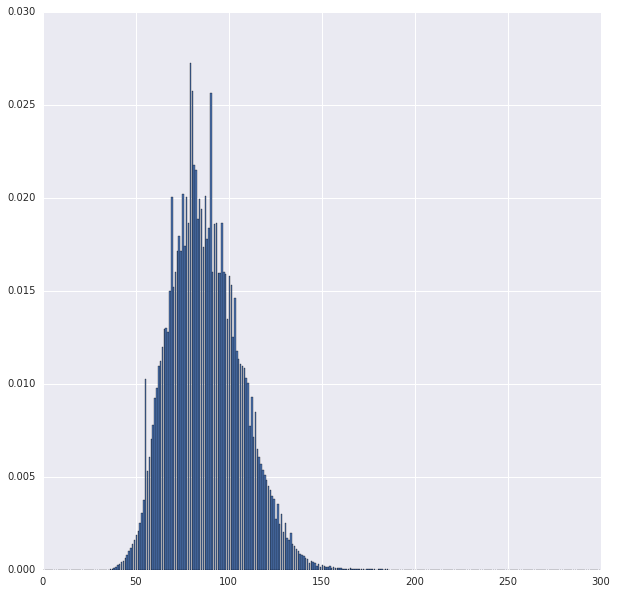

In [94]:
plt.figure(figsize=(10,10))
plt.bar(range(0,300), hist_avg)

### DF for Ramesh 

In [111]:
ramesh_df = full_final.copy()

from sklearn.preprocessing import OneHotEncoder

ramesh_df.EthnicGroup.value_counts()

ramesh_df.pdf = pd.Series([item[80] for item in ramesh_df.pdf])

ramesh_df['Gender'] = ramesh_df['Gender'].replace(['Male', 'Female'], [0, 1])
ramesh_df.rename(columns={'pdf':'TARGET'}, inplace=True)

ramesh_df.drop(['SA_ID', 'hist'], axis = 1, inplace = True)

ramesh_df.drop(['SA_IDmed'], axis = 1, inplace = True)

ramesh_df = pd.get_dummies(ramesh_df, columns = ['EthnicGroup', 'Race', 'ICU_unit'])
# ramesh_df.columnsu'Age', u'EthnicGroup',
#        u'Gender', u'ICU_unit', u'Race', u'SA_ID', u'hist', u'pdf'],